In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


# Preprocess

In [2]:
features = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')

In [3]:
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [4]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [5]:
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None
   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


In [6]:
print(train_df.describe())

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


## Feature

In [7]:
print(features.info())
print(features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB
None
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  

In [8]:
features['Date'] = pd.to_datetime(features['Date'])
features = features.drop(columns=['IsHoliday'])
print(features.info())
print(features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 703.9 KB
None
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN    

In [9]:
print(features.describe())

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

In [10]:
train_merged = train_df.merge(features[['Store','Date','Temperature']],on=['Store','Date'])

# train_df = train_merged
print(train_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 6 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2)
memory usage: 19.7 MB
None


In [11]:
train_df['Doty'] = pd.to_datetime(train_df['Date']).dt.dayofyear
train_df['Week'] = pd.to_datetime(train_df['Date']).dt.week
# train_df['Weekday'] = pd.to_datetime(train_df['Date']).dt.weekday
train_df['Quarter'] = pd.to_datetime(train_df['Date']).dt.quarter
train_df['Dotm'] = pd.to_datetime(train_df['Date']).dt.day
train_df['MonthStart'] = pd.to_datetime(train_df['Date']).dt.is_month_start
train_df['MonthEnd'] = pd.to_datetime(train_df['Date']).dt.is_month_end


y = train_df['Weekly_Sales'].values
X = train_df.drop(columns=['Weekly_Sales','Date']).values
label = train_df.drop(columns=['Weekly_Sales','Date']).columns

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
test_MAE_weight = [5 if x[3] else 1 for x in X_test]

## test data

In [13]:
test_df = pd.read_csv('test.csv')

test_df['Date'] = pd.to_datetime(test_df['Date'])
# test_df = test_df.merge(features[['Store','Date','Temperature']],on=['Store','Date'])

test_df['Doty'] = pd.to_datetime(test_df['Date']).dt.dayofyear
test_df['Week'] = pd.to_datetime(test_df['Date']).dt.week
# test_df['Weekday'] = pd.to_datetime(test_df['Date']).dt.weekday
test_df['Quarter'] = pd.to_datetime(test_df['Date']).dt.quarter
test_df['Dotm'] = pd.to_datetime(test_df['Date']).dt.day
test_df['MonthStart'] = pd.to_datetime(test_df['Date']).dt.is_month_start
test_df['MonthEnd'] = pd.to_datetime(test_df['Date']).dt.is_month_end

x_submission = test_df.drop(columns=['Date']).values
print(x_submission)

sample_sub = pd.read_csv('sampleSubmission.csv')

[[1 1 False ... 2 False False]
 [1 1 False ... 9 False False]
 [1 1 False ... 16 False False]
 ...
 [45 98 False ... 12 False False]
 [45 98 False ... 19 False False]
 [45 98 False ... 26 False False]]


# Random Forest

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [15]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
y_predicted = random_forest.predict(X_test)
error = mean_absolute_error(y_test,y_predicted, sample_weight=test_MAE_weight)
print(error)

1846.1623146650218


In [17]:
print(y_test)

[50932.42  3196.12 10125.03 ... 58317.53   229.    3443.32]


In [18]:
print(y_predicted)

[51536.588  1457.188 11003.264 ... 58167.239   337.569  4757.865]


[('Store', 0.36879235090034956), ('Dept', 0.5600513813590993), ('IsHoliday', 0.0012308193197409505), ('Doty', 0.03625557709095216), ('Week', 0.0206637367668751), ('Quarter', 0.00041807723964374787), ('Dotm', 0.012216304942192736), ('MonthStart', 0.00011590923772221422), ('MonthEnd', 0.0002558431434241166)]


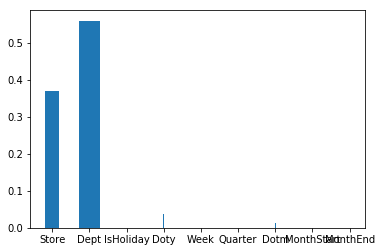

In [19]:
print(list(zip(label,random_forest.feature_importances_)))
plt.bar(label,random_forest.feature_importances_,random_forest.feature_importances_)
plt.show()

## Tuning

In [ ]:
# max_leaf = [i for i in range(5000,125000,5000)]
# leaf_error = []
# for i in max_leaf:
#     random_forest = RandomForestRegressor(random_state=42,max_leaf_nodes=i)
#     random_forest.fit(X_train,y_train)
#     y_predicted = random_forest.predict(X_test)
#     error = mean_absolute_error(y_test,y_predicted, sample_weight=test_MAE_weight)
#     leaf_error.append(error)
#     print(i, error)

In [ ]:
plt.plot(max_leaf,leaf_error)
plt.ylabel('mean absolute error')
plt.xlabel('max leaf')
plt.show()

In [20]:
# max_features = [i for i in range(2,11)]
# leaf_error = []
# for i in max_features:
#     random_forest = RandomForestRegressor(random_state=42,max_features=i)
#     random_forest.fit(X_train,y_train)
#     y_predicted = random_forest.predict(X_test)
#     error = mean_absolute_error(y_test,y_predicted, sample_weight=test_MAE_weight)
#     leaf_error.append(error)
#     print(i, error)

In [21]:
# plt.plot(max_features,leaf_error)
# plt.ylabel('mean absolute error')
# plt.xlabel('max_features')
plt.show()

# Submission

In [22]:
# random_forest = RandomForestRegressor(random_state=42)
# random_forest.fit(X_train,y_train)
y = random_forest.predict(x_submission)
sample_sub['Weekly_Sales'] = y
sample_sub.to_csv('forest_submission.csv',columns=['Id','Weekly_Sales'],index=False)

__Raw Data__: 6029.02252 __/__ 5664.89475 <br/>
__Use days of the year__: 3476.88503 __/__ 3369.14829<br/>
__Max Leaf Node = 30k:__ 3512.95249 __/__ 3417.74279<br/>
__Add date value:__ 3432.52948 __/__ 3366.84838